In [1]:
import pandas as pd
import sklearn
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_excel("data/pivottablefull.xlsx")
ewdf = pd.read_excel("data/Demographic-data-for-new-parliamentary-constituencies-November-2023.xlsx", sheet_name="EW_table", skiprows=5)
scotdf = pd.read_excel("data/Demographic-data-for-new-parliamentary-constituencies-November-2023.xlsx", sheet_name="Scotland_table", skiprows=6)

In [3]:
scotdf.columns
scotdf = scotdf.rename({
    "Aged 16-24":"Aged 16 to 24 years",
    "Aged 25 to 34":"Aged 25 to 34 years",
    "Aged 35 to 49":"Aged 35 to 49 years",
    "Aged 50 to 64":"Aged 50 to 64 years"
}, axis=1).copy()

In [4]:
df = pd.concat([ewdf,scotdf],ignore_index=True)

In [5]:
df[560:580]

,Unnamed: 0,ONS code,New constituency name,Total population,Number of households,Unnamed: 5,Aged 15 years and under,Aged 16 to 24 years,Aged 25 to 34 years,Aged 35 to 49 years,...,Sikh,Other religion,Not answered,Unnamed: 37,Owned outright,Owned with a mortgage or loan,Private rented,Social rented,Other tenure,Unnamed: 4
560,NaN,E14001591,Witney,97260.0,40272.0,NaN,0.186109,0.087343,0.129570,0.193810,...,0.000699,0.005059,0.057148,NaN,0.346494,0.306640,0.185116,0.138210,0.023540,NaN
561,NaN,E14001592,Woking,103943.0,41438.0,NaN,0.201657,0.086489,0.132004,0.228104,...,0.002742,0.004830,0.058051,NaN,0.319779,0.344611,0.210869,0.115643,0.009098,NaN
562,NaN,E14001593,Wokingham,98225.0,39179.0,NaN,0.206279,0.081852,0.106550,0.221143,...,0.011148,0.004194,0.058173,NaN,0.367544,0.387223,0.140126,0.083284,0.021823,NaN
563,NaN,E14001594,Wolverhampton North East,104528.0,42285.0,NaN,0.213244,0.103408,0.137045,0.188256,...,0.075209,0.006085,0.056754,NaN,0.304623,0.259903,0.150550,0.277947,0.006976,NaN
564,NaN,E14001595,Wolverhampton South East,119746.0,46651.0,NaN,0.232542,0.105665,0.143796,0.202679,...,0.116070,0.013253,0.052636,NaN,0.253778,0.239823,0.185527,0.313112,0.007760,NaN
565,NaN,E14001596,Wolverhampton West,112655.0,45172.0,NaN,0.192719,0.105791,0.130237,0.203265,...,0.143811,0.013430,0.052789,NaN,0.334743,0.259121,0.221110,0.176459,0.008567,NaN
566,NaN,E14001597,Worcester,103872.0,44724.0,NaN,0.175841,0.120937,0.140317,0.192939,...,0.001617,0.004342,0.060989,NaN,0.320186,0.293847,0.212280,0.162530,0.011157,NaN
567,NaN,E14001598,Worsley and Eccles,106630.0,46032.0,NaN,0.192891,0.092150,0.151336,0.199325,...,0.002166,0.002757,0.045776,NaN,0.299379,0.328424,0.167058,0.196689,0.008451,NaN
568,NaN,E14001599,Worthing West,99730.0,45327.0,NaN,0.157716,0.078933,0.112795,0.179184,...,0.000953,0.006347,0.060162,NaN,0.404130,0.287400,0.199616,0.100470,0.008384,NaN
569,NaN,W07000111,Wrexham,99079.0,42305.0,NaN,0.181754,0.093390,0.124749,0.192230,...,0.000696,0.003714,0.065149,NaN,0.348871,0.283111,0.165631,0.196076,0.006311,NaN


In [6]:
df = df.drop([0,1,577,578]).copy()

In [7]:
drop_cols = ["Unnamed: 0", "ONS code", "New constituency name", "Unnamed: 5", 'Unnamed: 12', 'Unnamed: 20', 'Unnamed: 27','Unnamed: 37']
unnamed_cols = [col for col in df.columns if "Unnamed:" in col]
for col in unnamed_cols:
    drop_cols.append(col)
print(drop_cols)
xdf = df.drop(drop_cols,axis=1)
xdf = xdf.dropna(axis=1).copy()
# xdf.fillna(xdf.mean(), inplace=True)
X = xdf.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

['Unnamed: 0', 'ONS code', 'New constituency name', 'Unnamed: 5', 'Unnamed: 12', 'Unnamed: 20', 'Unnamed: 27', 'Unnamed: 37', 'Unnamed: 0', 'Unnamed: 5', 'Unnamed: 12', 'Unnamed: 20', 'Unnamed: 27', 'Unnamed: 37', 'Unnamed: 4']


In [8]:

km = KMeans()
km.fit(X)

ms = MeanShift()
ms.fit(X)


MeanShift()

In [9]:
X

array([[0.52666746, 0.51080621, 0.07331108, ..., 0.37691535, 0.75785759,
        0.52634707],
       [0.72510278, 0.50652286, 0.08537422, ..., 0.58030031, 0.62375981,
        0.3764585 ],
       [0.53492197, 0.45997134, 0.05711744, ..., 0.36296455, 0.77878084,
        0.60133146],
       ...,
       [0.609907  , 0.34829314, 0.14016012, ..., 0.34015035, 0.80907191,
        0.52296757],
       [0.568395  , 0.52759723, 0.0439625 , ..., 0.56841473, 0.85070917,
        0.51068071],
       [0.51650501, 0.43305633, 0.0761012 , ..., 0.36482899, 0.88194731,
        0.49444966]])

In [10]:
xdf[xdf["Total population"]>120000]

,Total population,Aged 15 years and under,Aged 16 to 24 years,Aged 25 to 34 years,Aged 35 to 49 years,Aged 50 to 64 years,Aged 65 years and over
15,133816.0,0.264507,0.116130,0.156216,0.236775,0.149968,0.076404
28,126756.0,0.186372,0.171967,0.259844,0.212998,0.108515,0.060304
35,121722.0,0.219525,0.109955,0.147820,0.193235,0.188544,0.140919
37,122294.0,0.259318,0.128739,0.138519,0.187785,0.159231,0.126408
38,151865.0,0.230196,0.211621,0.192393,0.189575,0.112026,0.064188
40,121861.0,0.239843,0.139435,0.146878,0.205764,0.158974,0.109106
54,123536.0,0.243832,0.115068,0.146451,0.193733,0.167886,0.133030
63,121355.0,0.253381,0.151308,0.151209,0.203510,0.136360,0.104231
66,134512.0,0.200357,0.119894,0.167489,0.221857,0.177801,0.112601
67,133671.0,0.181782,0.129976,0.178752,0.221499,0.164882,0.123108


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


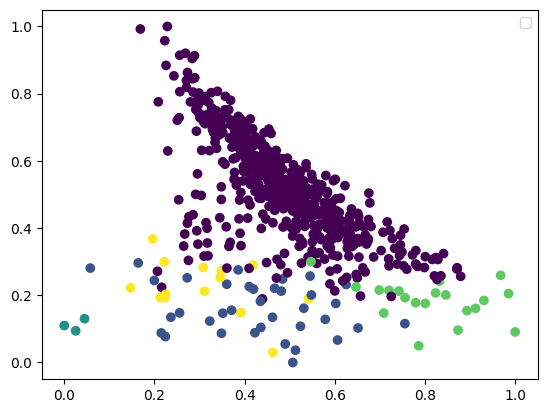

In [11]:
plt.scatter(X[:,1], X[:,6], c=ms.labels_)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


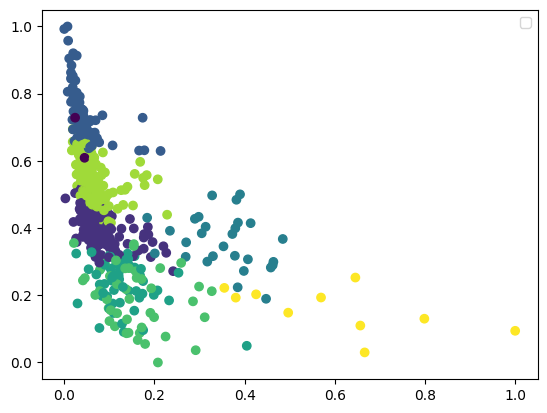

In [12]:
plt.scatter(X[:,2], X[:,6], c=km.labels_)
plt.legend()
plt.show()

In [13]:
ms.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 4, 3, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
df["Cluster"] = km.labels_

In [15]:
df["Cluster"].value_counts()

Cluster
6    226
1    148
2    112
4     62
5     44
3     28
7     10
0      2
Name: count, dtype: int64

In [16]:
df = df.drop(unnamed_cols, axis=1)

In [17]:
df.to_csv("outputs/clusteredconstituencies.csv",index=False)